In [146]:
#TO visualize we load dataset and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###To visulaize first we load dataset

In [147]:
data=pd.read_excel('/content/ANZ synthesised transaction dataset.xlsx')
print('Data loaded successful')

Data loaded successful


Now we look at dataset

In [148]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [149]:
rows,columns=data.shape
print('The number of rows in dataset is:',rows)
print('The number of columns in dataset is:',columns)

The number of rows in dataset is: 12043
The number of columns in dataset is: 23


###All ways check for data types sometimes data might be in wrong format

In [150]:
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

It seems all the features are in correct format


In [151]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

####Evaluating missing data

In [152]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

From above we can absorb columns bpay_biller_code and merchant_code has lot of missing values it is good to drop those when we have lot of missing values

In [153]:
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [154]:
data['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [155]:
data['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [156]:
data.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


currency is of one category only so we can remove that feature also

Dropping irrevelant columns

In [157]:
data.drop(['account','txn_description','merchant_id','first_name','currency','long_lat','transaction_id','country','extraction','merchant_long_lat'],axis=1,inplace=True)
data.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


Finally we have got dataframe with relevant feature now we make exploratory data analysis

Total number of transcation made on each day

In [158]:
x=data['date'].value_counts().rename_axis('date').reset_index(name='values')
print(x)

         date  values
0  2018-09-28     174
1  2018-08-17     172
2  2018-10-05     168
3  2018-10-17     162
4  2018-09-14     161
..        ...     ...
86 2018-08-06      99
87 2018-08-20      97
88 2018-10-23      96
89 2018-10-08      95
90 2018-10-30      89

[91 rows x 2 columns]


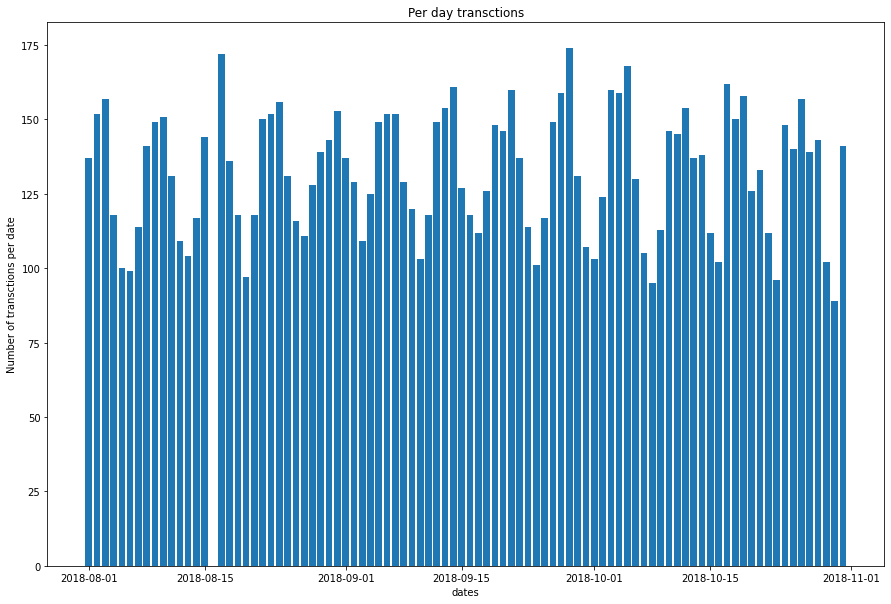

In [160]:
fig,ax=plt.subplots(figsize=(15,10))
ax.bar(x['date'],x['values'])
plt.xlabel('dates')
plt.ylabel('Number of transctions per date')
plt.title('Per day transctions')
plt.show()


In [162]:
x1=data['movement'].value_counts().rename_axis('mode').reset_index(name='value')
print(x1)

     mode  value
0   debit  11160
1  credit    883


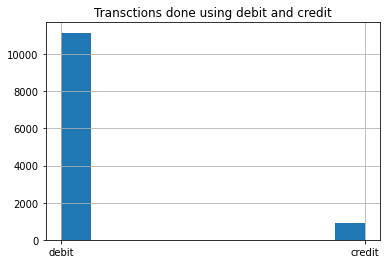

In [163]:
data['movement'].hist()
plt.title('Transctions done using debit and credit')
plt.show()

We can observe that people using debit card payment are more in number when compared with credit card payment

**Lets make an analysis on customer transctions**

In [164]:
data['customer_id'].nunique()

100

We can find 100 unique customers

**Total number of transctions done by customers**

In [165]:
x2=x1=data['customer_id'].value_counts().rename_axis('cutomer_id').reset_index(name='value')
print(x2)

        cutomer_id  value
0   CUS-2487424745    578
1   CUS-2142601169    303
2   CUS-3026014945    292
3   CUS-3378712515    260
4   CUS-1614226872    259
..             ...    ...
95  CUS-3395687666     40
96  CUS-3201519139     37
97  CUS-1646183815     34
98   CUS-495599312     31
99  CUS-1739931018     25

[100 rows x 2 columns]


**Average transctions done by each customers**

In [166]:
cus=data.groupby('customer_id').mean()

In [167]:
cus.reset_index(inplace=True)

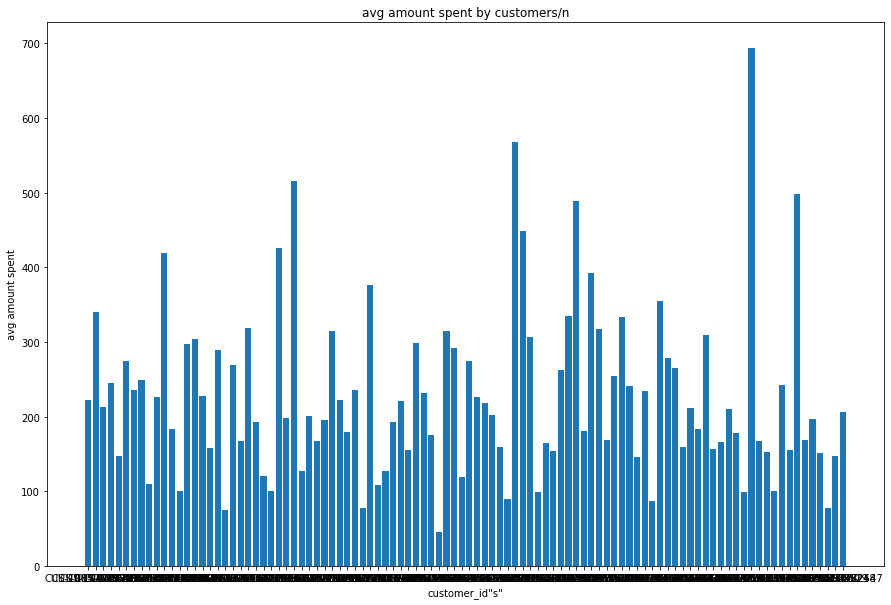

In [168]:
fig,ax=plt.subplots(figsize=(15,10))
ax.bar(cus['customer_id'],cus['amount'])
plt.xlabel('customer_id\"s\"')
plt.ylabel('avg amount spent')
plt.title('avg amount spent by customers/n')
plt.show()

It is hard to find customer_id's on x-axis but this can be used as reffernce

In [169]:
cus.head()

,customer_id,card_present_flag,balance,age,amount
0,CUS-1005756958,0.812500,2275.852055,53,222.862603
1,CUS-1117979751,0.826923,9829.929000,21,339.843700
2,CUS-1140341822,0.815385,5699.212250,28,212.632500
3,CUS-1147642491,0.750000,9032.841186,34,245.600169
4,CUS-1196156254,0.785276,22272.433755,34,147.145796


**Let's visualize which age group people make more transcations**

In [170]:
ys=cus['age'].min() #customer's least age spending money
yl=cus['age'].max()  #customer's highest age spending money
print(ys)
print(yl)

18
78


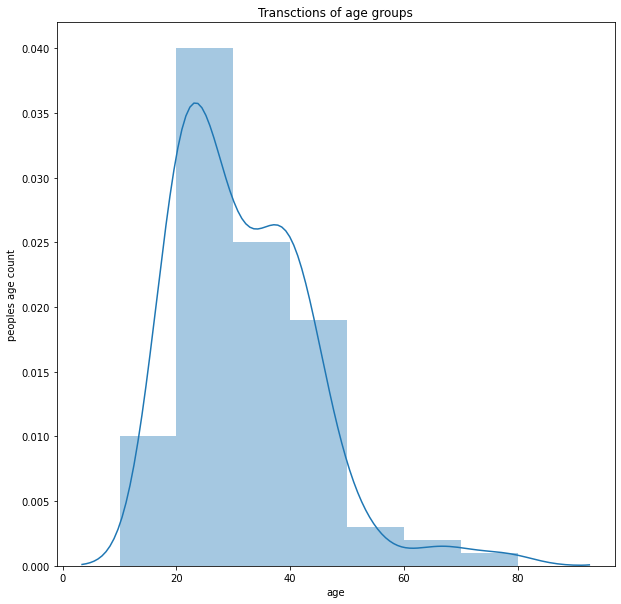

In [171]:
fig,ax=plt.subplots(figsize=(10,10))
sns.distplot(cus['age'],bins=[10,20,30,40,50,60,70,80],ax=ax)
plt.ylabel('peoples age count')
plt.title('Transctions of age groups')
plt.show()

From above we can observe people whose age is between 20-30 have done more transctions

**Now we visulaize montly wise transactions**

In [172]:
dm=[]
for i in data['date']:
  x=str(i).split()
  y=x[0].split('-')
  if '08' in y[1]:
    dm.append('August')
  elif '09' in y[1]:
    dm.append('September')
  elif '10' in y[1]:
    dm.append('October')    

In [173]:
data.insert(4,'month',dm)

In [174]:
data.head(2)

,status,card_present_flag,balance,date,month,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,August,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,August,F,26,Sydney,NSW,14.19,CUS-2487424745,debit


In [175]:
data['month'].value_counts()

October      4087
September    4013
August       3943
Name: month, dtype: int64

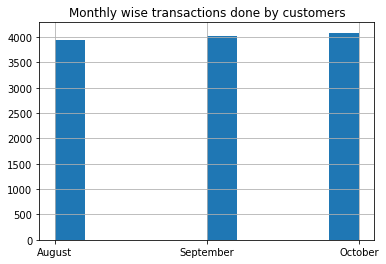

In [176]:
data['month'].hist()
plt.title('Monthly wise transactions done by customers')
plt.show()

Transactions are highly done in october when compared to other months

In [177]:
m=data.groupby('month').mean()
m[['balance','amount']].head()

,balance,amount
month,,
August,10794.148620,185.121867
October,18450.991566,196.427323
September,14730.151136,182.045903


From above we can observe customers average balance and amount in the months of August,October,September

In [178]:
m1=data[data['month']=='August'].groupby('customer_id').mean()

In [179]:
m1.reset_index(inplace=True)
m1

,customer_id,card_present_flag,balance,age,amount
0,CUS-1005756958,0.857143,903.382800,53,122.788000
1,CUS-1117979751,0.785714,6750.908372,21,202.402326
2,CUS-1140341822,0.700000,2275.090000,28,294.950667
3,CUS-1147642491,0.764706,3768.855862,34,305.363103
4,CUS-1196156254,0.814815,17873.442805,34,179.216220
...,...,...,...,...,...
95,CUS-72755508,0.933333,1964.083158,35,189.337895
96,CUS-809013380,0.836364,2733.607794,21,105.385441
97,CUS-860700529,0.750000,1463.578868,30,105.405094
98,CUS-880898248,0.800000,6307.059375,26,134.296562


From above we can observe average balances and amount in **August** month by customers

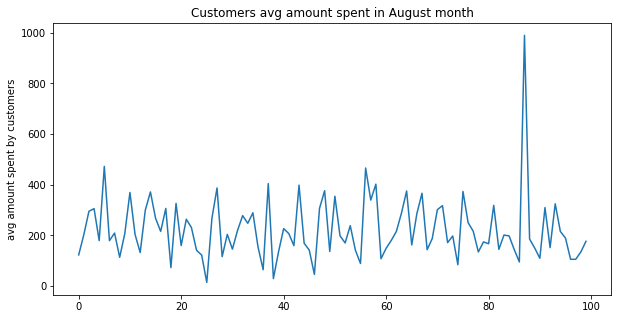

In [180]:
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(m1['amount'])
plt.ylabel('avg amount spent by customers')
plt.title('Customers avg amount spent in August month')
plt.show()

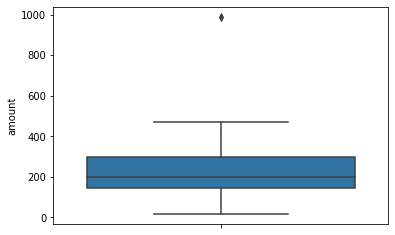

In [192]:
sns.boxplot(m1['amount'],orient='v')
plt.show()

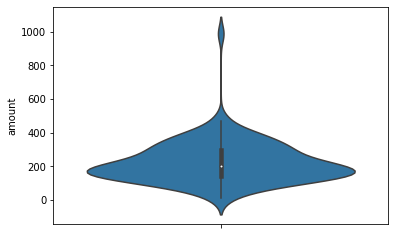

In [197]:
sns.violinplot(m1['amount'],orient='v')
plt.show()

From above plots we can observe trasction amount distributions in the month of August

In [181]:
m2=data[data['month']=='September'].groupby('customer_id').mean()
m2.reset_index(inplace=True)
m2

,customer_id,card_present_flag,balance,age,amount
0,CUS-1005756958,0.500000,3706.160714,53,333.087143
1,CUS-1117979751,0.888889,9334.488800,21,530.304400
2,CUS-1140341822,0.882353,5505.279091,28,277.897727
3,CUS-1147642491,0.800000,7857.650256,34,228.825128
4,CUS-1196156254,0.732394,22436.096633,34,113.517449
...,...,...,...,...,...
95,CUS-72755508,0.888889,4753.496923,35,242.844615
96,CUS-809013380,0.709677,4074.157857,21,140.050714
97,CUS-860700529,0.762500,3416.491798,30,68.092247
98,CUS-880898248,1.000000,8683.385882,26,200.494706


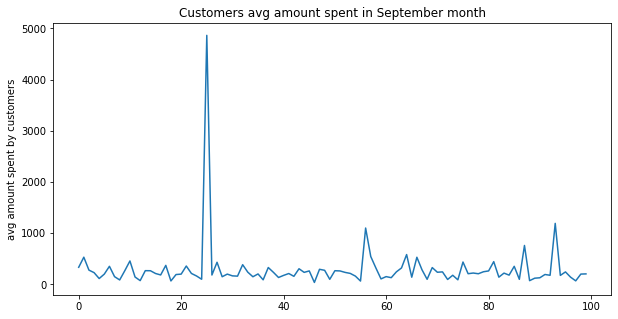

In [182]:
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(m2['amount'])
plt.ylabel('avg amount spent by customers')
plt.title('Customers avg amount spent in September month')
plt.show()

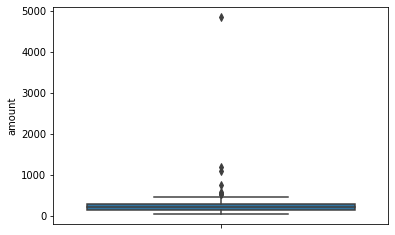

In [190]:
sns.boxplot(m2['amount'],orient='v')
plt.show()

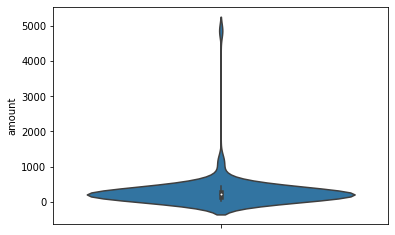

In [198]:
sns.violinplot(m2['amount'],orient='v')
plt.show()

From above plots we can observe transction amount distributions in the month of September

In [199]:
m3=data[data['month']=='October'].groupby('customer_id').mean()
m3.reset_index(inplace=True)
m3

,customer_id,card_present_flag,balance,age,amount
0,CUS-1005756958,NaN,7675.756667,53,607.372222
1,CUS-1117979751,0.866667,14354.425625,21,375.733125
2,CUS-1140341822,0.815789,6992.895116,28,150.525349
3,CUS-1147642491,0.705882,13002.601600,34,224.022200
4,CUS-1196156254,0.842105,27575.176769,34,157.388923
...,...,...,...,...,...
95,CUS-72755508,0.809524,6220.971923,35,180.152692
96,CUS-809013380,1.000000,7775.428571,21,411.553571
97,CUS-860700529,0.841463,4671.130330,30,70.914286
98,CUS-880898248,0.857143,10889.838276,26,129.536207


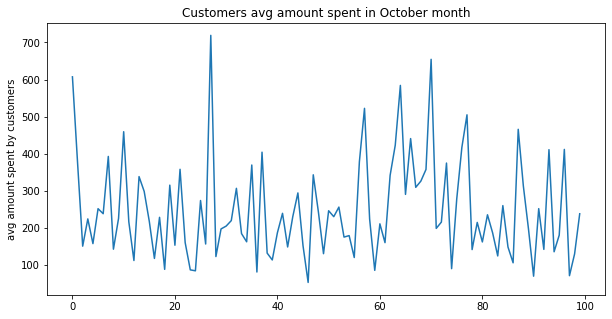

In [201]:
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(m3['amount'])
plt.ylabel('avg amount spent by customers')
plt.title('Customers avg amount spent in October month')
plt.show()

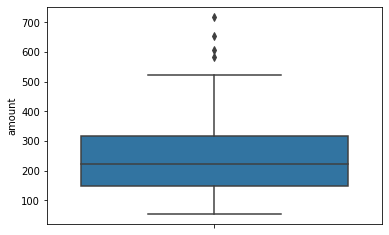

In [202]:
sns.boxplot(m3['amount'],orient='v')
plt.show()

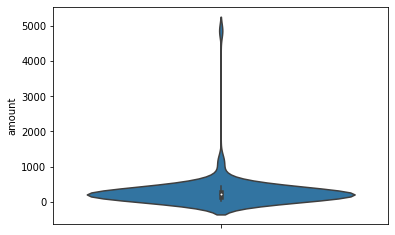

In [203]:
sns.violinplot(m2['amount'],orient='v')
plt.show()

From above plots we can observe october month transactions amount distribution by customers